In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)
pathTT_3BFF = HOME_DIR + 'content/trained_models/task-trained/tt_3bff/'
pathTT_MT = HOME_DIR + 'content/trained_models/task-trained/tt_MultiTask/'
pathTT_RT = HOME_DIR + 'content/trained_models/task-trained/tt_RandomTarget/'

an_TT_3BFF = Analysis_TT(run_name = "TT_3BFF", filepath = pathTT_3BFF)
an_TT_MT = Analysis_TT(run_name = "TT_MT", filepath = pathTT_MT)
an_TT_RT = Analysis_TT(run_name = "TT_RT", filepath = pathTT_RT)

path_GRU_Sweep_3BFF = pathTT_3BFF + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240702_GRU_3BFF/"
subfolders_GRU_3BFF = [f.path for f in os.scandir(path_GRU_Sweep_3BFF) if f.is_dir()]

path_LFADS_Sweep_3BFF = pathTT_3BFF + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240702_NBFF_LFADS/"
subfolders_LFADS_3BFF = [f.path for f in os.scandir(path_LFADS_Sweep_3BFF) if f.is_dir()]

path_GRU_Sweep_MT = pathTT_MT + "max_epochs=500 see/20240705_MultiTask_GRU/"
subfolders_GRU_MT = [f.path for f in os.scandir(path_GRU_Sweep_MT) if f.is_dir()]

path_LFADS_Sweep_MT = pathTT_MT + "max_epochs=500 see/20240705_MultiTask_LFADS/"
subfolders_LFADS_MT = [f.path for f in os.scandir(path_LFADS_Sweep_MT) if f.is_dir()]

path_GRU_Sweep_RT = pathTT_RT + "max_epochs=2000 latent_size=128 l2_wt=5e-05 proprioception_delay=0.02 vision_delay=0.05 n_samples=1100 n_samples=1100 seed=0 learning_rate=0./20240625_RandomTargetGRU/"
subfolders_GRU_RT = [f.path for f in os.scandir(path_GRU_Sweep_RT) if f.is_dir()]

path_LFADS_Sweep_RT = pathTT_RT + "max_epochs=2000 latent_size=128 l2_wt=5e-05 proprioception_delay=0.02 vision_delay=0.05 n_samples=1100 n_samples=1100 seed=0 learning_rate=0./20240625_RandomTargetLFADS/"
subfolders_LFADS_RT = [f.path for f in os.scandir(path_LFADS_Sweep_RT) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


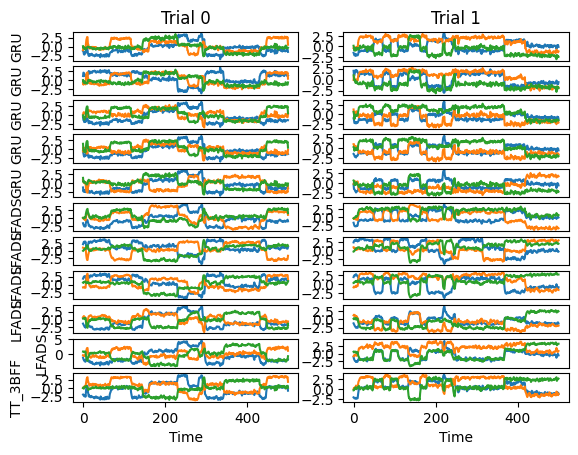

In [3]:
comparison_3BFF = Comparison(comparison_tag="3BFF")
comparison_3BFF.load_analysis(an_TT_3BFF, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU_3BFF:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison_3BFF.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LFADS_3BFF:
    subfolder = subfolder + "/"
    analysis_LFADS = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison_3BFF.load_analysis(analysis_LFADS, group = "LFADS")


comparison_3BFF.regroup()
comparison_3BFF.plot_trials(num_trials=2)

In [4]:
comparison_MT = Comparison(comparison_tag="MultiTask")
comparison_MT.load_analysis(an_TT_MT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU_MT:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison_MT.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LFADS_MT:
    subfolder = subfolder + "/"
    analysis_LFADS = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison_MT.load_analysis(analysis_LFADS, group = "LFADS")


comparison_MT.regroup()

In [5]:
comparison_RT = Comparison(comparison_tag="RandomTarget")
comparison_RT.load_analysis(an_TT_RT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU_RT:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison_RT.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LFADS_RT:
    subfolder = subfolder + "/"
    analysis_LFADS = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison_RT.load_analysis(analysis_LFADS, group = "LFADS")


comparison_RT.regroup()

Working on 1 of 11: GRU
Group: GRU
Rate R2: 0.9092841148376465
State R2: 0.8724590539932251
Working on 2 of 11: GRU
Group: GRU
Rate R2: 0.9047721028327942
State R2: 0.8636111617088318
Working on 3 of 11: GRU
Group: GRU
Rate R2: 0.9158799648284912
State R2: 0.8641428351402283
Working on 4 of 11: GRU
Group: GRU
Rate R2: 0.929063081741333
State R2: 0.882246196269989
Working on 5 of 11: GRU
Group: GRU
Rate R2: 0.9232826828956604
State R2: 0.8776282668113708
Working on 6 of 11: LFADS
Group: LFADS
Rate R2: 0.8629795908927917
State R2: 0.8974051475524902
Working on 7 of 11: LFADS
Group: LFADS
Rate R2: 0.8853024840354919
State R2: 0.9140797257423401
Working on 8 of 11: LFADS
Group: LFADS
Rate R2: 0.8926743268966675
State R2: 0.9185178279876709
Working on 9 of 11: LFADS
Group: LFADS
Rate R2: 0.8747422695159912
State R2: 0.906007707118988
Working on 10 of 11: LFADS
Group: LFADS
Rate R2: 0.9068602919578552
State R2: 0.9317176342010498
Working on 11 of 11: TT_3BFF
Group: TT
Working on 1 of 11: GRU

array([[0.60025531, 0.81738979],
       [0.61269295, 0.83282876],
       [0.62267071, 0.82785505],
       [0.63499159, 0.83692133],
       [0.62550825, 0.84100795],
       [0.83530569, 0.85625851],
       [0.83802599, 0.86069018],
       [0.83896506, 0.86075389],
       [0.83399338, 0.85299623],
       [0.8391313 , 0.8491261 ],
       [0.        , 0.        ]])

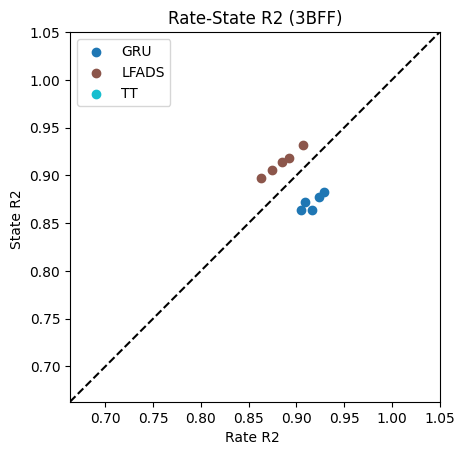

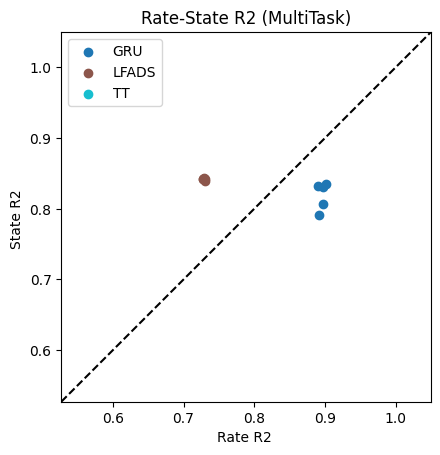

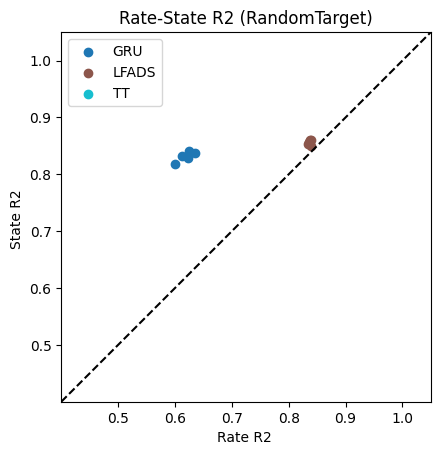

In [6]:
comparison_3BFF.compare_rate_state_r2()
comparison_MT.compare_rate_state_r2()
comparison_RT.compare_rate_state_r2()

In [7]:
an_TT.plot_trial_io(num_trials=1)

NameError: name 'an_TT' is not defined

In [ ]:
slds_list = [slds8_4]
for slds in slds_list:
    slds.plot_fps()

In [ ]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict = plot_dict)

In [ ]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

tt_latents = an_TT.get_latents(phase = 'val').detach().cpu().numpy()
gru_latents = analysis_GRU.get_latents(phase = 'val').detach().cpu().numpy()
lds_latents = analysis_LDS.get_latents(phase = 'val').detach().cpu().numpy()
node_latents = analysis_NODE.get_latents(phase = 'val').detach().cpu().numpy()

print(tt_latents.shape)
print(gru_latents.shape)
print(lds_latents.shape)
print(node_latents.shape)

# dict1 = {
#     'tt': tt_latents,
#     'gru': gru_latents,
#     'lds': lds_latents,
#     'node': node_latents
# }

# # Save dict as pickle
# import pickle
# with open('latents.pkl', 'wb') as f:
#     pickle.dump(dict1, f)


In [ ]:
lr_gru = LinearRegression()
lr_lds = LinearRegression()
lr_node = LinearRegression()

tt_latents_flat = tt_latents.reshape(-1, tt_latents.shape[-1])
gru_latents_flat = gru_latents.reshape(-1, gru_latents.shape[-1])
lds_latents_flat = lds_latents.reshape(-1, lds_latents.shape[-1])
node_latents_flat = node_latents.reshape(-1, node_latents.shape[-1])

lr_gru.fit(gru_latents_flat, tt_latents_flat)
lr_lds.fit(lds_latents_flat, tt_latents_flat)
lr_node.fit(node_latents_flat, tt_latents_flat)


gru_latents_pred = lr_gru.predict(gru_latents_flat)
lds_latents_pred = lr_lds.predict(lds_latents_flat)
node_latents_pred = lr_node.predict(node_latents_flat)

print(gru_latents_pred.shape)
gru_lats_tt = gru_latents_pred.reshape(tt_latents.shape)
lds_lats_tt = lds_latents_pred.reshape(tt_latents.shape)
node_lats_tt = node_latents_pred.reshape(tt_latents.shape)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(tt_latents[0,:,0], label = "TT")
ax.plot(gru_lats_tt[0,:,0], label = "GRU")
ax.plot(lds_lats_tt[0,:,0], label = "LDS")
ax.plot(node_lats_tt[0,:,0], label = "NODE")

ax.legend()


In [ ]:
r2_vals = comparison_single.plot_neural_preds(neuron_list =[1,2], trial_list = [5,10])

In [ ]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_DTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.load_analysis(slds3_1, group = "SLDS3")
comparison_single.regroup()

#comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)
# comparison_single.plot_trials_reference_dims(num_trials=2, dims = [0,1,2,3])


In [ ]:

def visualize_stateR2(comp, num_trials=2, ref_ind = None, pcs_to_plot = [7,8,9,10,11]):
    self = comp
    if ref_ind is None:
        ref_ind = self.ref_ind
    if ref_ind is None and self.ref_ind is None:
        # Throw an error
        raise ValueError("No reference index provided")
    ref_lats = (
        self.analyses[ref_ind]
        .get_latents(
            phase="val",
        )
        .detach()
        .numpy()
    )
    pca = PCA()
    ref_lats_flat = ref_lats.reshape(
        ref_lats.shape[0] * ref_lats.shape[1], ref_lats.shape[2]
    )
    ref_lats_pca_flat = pca.fit_transform(ref_lats_flat)
    ref_lats_pca = ref_lats_pca_flat.reshape(ref_lats.shape)

    fig = plt.figure(figsize = (20,10))
    axes = fig.subplots(self.num_analyses, len(pcs_to_plot))
    for i in range(self.num_analyses):
        latents = self.analyses[i].get_latents(phase="val").detach().numpy()
        pca_DT = PCA()

        lats_flat = latents.reshape(
            latents.shape[0] * latents.shape[1], latents.shape[2]
        )
        lats_pca_flat = pca_DT.fit_transform(lats_flat)

        reg = LinearRegression().fit(ref_lats_pca_flat, lats_pca_flat)
        pred_latents_pca_flat = reg.predict(ref_lats_pca_flat)
        r2_scores = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='raw_values')
        var_r2_score = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='variance_weighted')
        print(f"R2 Score for {self.analyses[i].run_name}: {var_r2_score}")
        pred_latents_pca = pred_latents_pca_flat.reshape(latents.shape)
        lats_pca = lats_pca_flat.reshape(latents.shape)

        for j in range(len(pcs_to_plot)):
            pc_num = pcs_to_plot[j] + 1
            if pc_num < latents.shape[2]:
                axes[i, j].plot(pred_latents_pca[0, :100, pc_num], c = 'r', label="Predicted from TT")
                axes[i, j].plot(lats_pca[0, :100, pc_num], c = 'k', label = "True from DT")
                axes[i, j].text(75, .01, s= f"R2: {r2_scores[pc_num]:.2f}")
            else:
                axes[i, j].plot(np.zeros(lats_pca[0, :100, 0].shape), label = "Predicted from TT") 
            if i == self.num_analyses - 1:
                axes[i, j].set_xlabel("Time")
            else:
                axes[i, j].set_xticks([])

        axes[i, 0].set_ylabel(f"{self.analyses[i].run_name}")
    plt.savefig(f"state_r2_dims.pdf")

In [ ]:
analysis_NODE.plot_scree(max_pcs = 12   )

In [ ]:
analysis_GRU.plot_scree(max_pcs = 12)

In [ ]:
analysis_LDS.plot_scree(max_pcs = 12)

In [ ]:

visualize_stateR2(comparison_single, pcs_to_plot=[7,8,9,10,11,12])

In [ ]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
lats_TT = an_TT.get_latents().detach().numpy()
lats_GRU = analysis_GRU.get_latents().detach().numpy()
lats_NODE = analysis_NODE.get_latents().detach().numpy()
lats_LDS = analysis_LDS.get_latents().detach().numpy()

plot_model_fps(fpsTT, latents=lats_TT, q_thresh = 1e-7, label = "TT")
plot_model_fps(fpsDT_GRU, latents = lats_GRU, q_thresh = 1e-6, label = "DT_GRU")
plot_model_fps(fpsDT_NODE, latents = lats_NODE, q_thresh = 1e-7, label = "DT_NODE")
plot_model_fps(fpsDT_LDS, latents = lats_LDS, q_thresh = 1e-7, label = "DT_LDS")

In [ ]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

In [ ]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)